In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS

# Data Preprocessing and Visualization

In [21]:
data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
#remove textual columns
data = data.drop(columns=['ocean_proximity'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [25]:
display(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [26]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
# Try feature scaling
# X = data.drop(columns=['median_house_value'])
# scaler = SS()
# scaler.fit(X)
# x_scaled = scaler.transform(X)
# data_scaled = pd.DataFrame(x_scaled, columns=X.columns)
# data_scaled['median_house_value'] = data['median_house_value']
# display(data['median_house_value'])
# display(data_scaled)

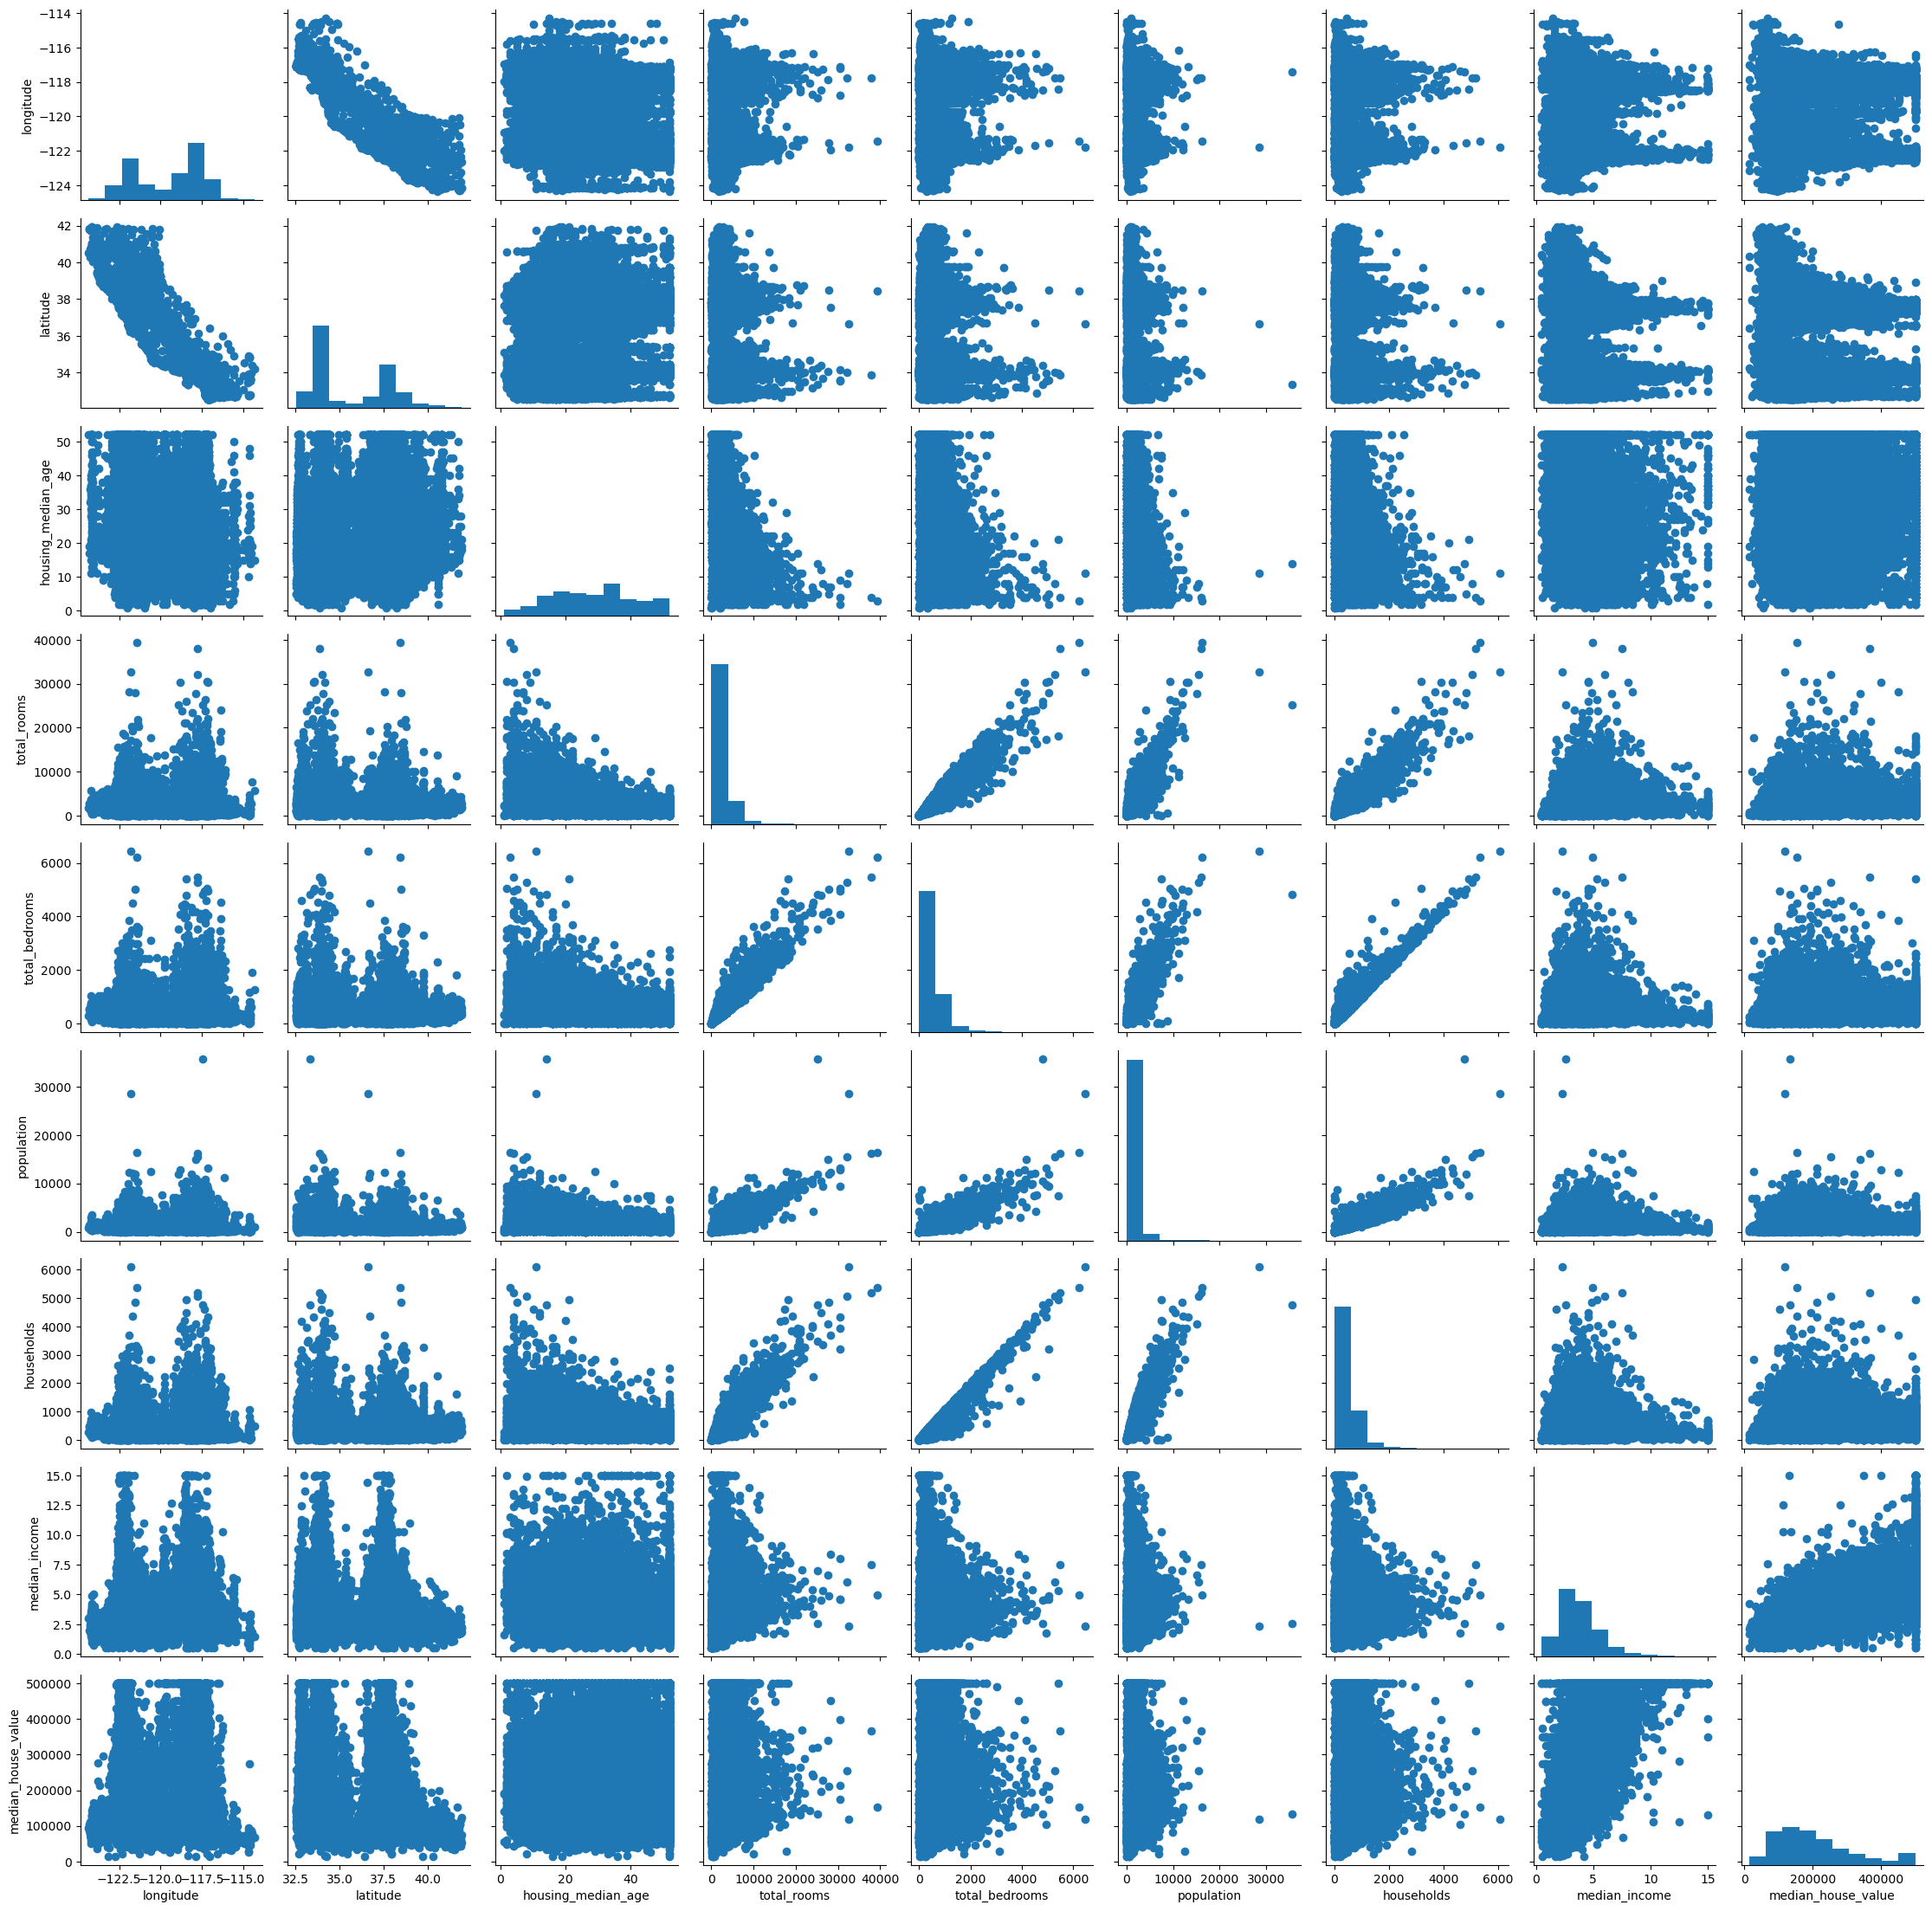

In [28]:
# Display graphs
graphs = sns.PairGrid(data)
graphs.map_diag(plt.hist)
graphs.map_offdiag(plt.scatter)

# Splitting Data into Testing and Training

In [29]:
X = data[['median_income']]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,median_income
2830,1.7109
14951,2.4567
8314,2.1579
14271,1.0531
305,1.8913
...,...
11397,5.4286
12081,4.7965
5447,3.0990
866,5.2879


,median_income
14416,3.1838
16383,4.4871
7731,3.2237
1410,2.8920
1335,4.1016
...,...
14148,3.6125
14743,3.5125
19496,3.2632
20553,2.8068


2830      44600.0
14951    155000.0
8314     450000.0
14271     65700.0
305       91200.0
           ...   
11397    273400.0
12081    160800.0
5447     335400.0
866      231200.0
15948    251800.0
Name: median_house_value, Length: 15324, dtype: float64

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
           ...   
14148    122500.0
14743    142400.0
19496    138100.0
20553     95300.0
19633    250000.0
Name: median_house_value, Length: 5109, dtype: float64

In [30]:
print(f"X_train shape: {X_train.shape}\n" + 
      f"X_test shape: {X_test.shape}\n" +
      f"y_train shape: {y_train.shape}\n" +
      f"y_test shape: {y_test.shape}")

X_train shape: (15324, 1)
X_test shape: (5109, 1)
y_train shape: (15324,)
y_test shape: (5109,)


In [31]:
print(f"X_train: {type(X_train)}\n" + 
      f"X_test: {type(X_test)}\n" +
      f"y_train: {type(y_train)}\n" +
      f"y_test: {type(y_test)}")

X_train: <class 'pandas.core.frame.DataFrame'>
X_test: <class 'pandas.core.frame.DataFrame'>
y_train: <class 'pandas.core.series.Series'>
y_test: <class 'pandas.core.series.Series'>


# Linear Regression Model

In [32]:
training_model = LinearRegression().fit(X_train, y_train)
print("intercept: ", training_model.intercept_)
print("coeff: ", training_model.coef_)

intercept:  45651.031107609684
coeff:  [41644.56048539]


Regression of Median Income vs Median House Value (Training)

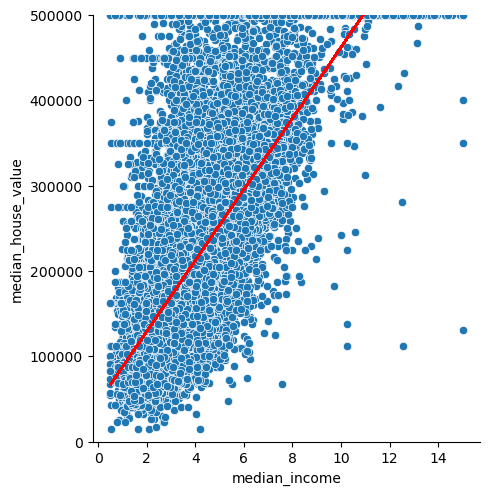

In [33]:
sns.relplot(x='median_income', y='median_house_value', data=data)
training_predictions = training_model.predict(X_train[['median_income']])
plt.plot(X_train[['median_income']], training_predictions, c='red')
plt.ylim(0,500000)
plt.show()

Regression of Median Income vs Median House Value (Test)

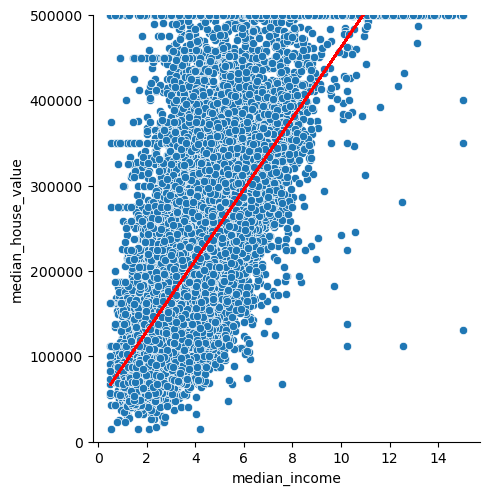

In [39]:
sns.relplot(x='median_income', y='median_house_value', data=data)
testing_predictions = training_model.predict(X_test[['median_income']])
plt.plot(X_test[['median_income']], testing_predictions, c='red')
plt.ylim(0,500000)
plt.show()

# Metrics

Training Metrics

In [35]:
mse = mean_squared_error(y_train, training_predictions)
print("MSE: ", mse)
r2 = r2_score(y_train, training_predictions)
print("R2: ", r2)

MSE:  6997481718.923448
R2:  0.472154321514369


Testing Metrics

In [36]:
mse = mean_squared_error(y_test, testing_predictions)
print("MSE: ", mse)
r2 = r2_score(y_test, testing_predictions)
print("R2: ", r2)

MSE:  7052223802.224631
R2:  0.47872609012331746


In [37]:
print((max(y_train)-min(y_train))**2/len(y_train))

15350231.010441137
